In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("CooperUnion/anime-recommendations-database")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\gbfra\.cache\kagglehub\datasets\CooperUnion\anime-recommendations-database\versions\1


Base -> Anime Recommendations Database

Realizar EDA sobre a base de recomendações de animes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Realizar a importação da base de dados usando pandas

In [3]:
df = pd.read_csv(r'databases/anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
num_registros = len(df)
print(f'Tamanho do Dataset: {num_registros}')

print('=============================================================================================================================')
print('Caracteristicas básicas do dataset:')
df.dtypes

Tamanho do Dataset: 12294
Caracteristicas básicas do dataset:


anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

Descrição das Variáveis

- **anime_id** --> Qualitativa Nominal
- **name** --> Qualitativa Nominal
- **genre** --> Qualitativa Nominal
- **type** --> Qualitativa Nominal
- **episodes** --> Quantitativa Discreta
- **rating** --> Quantitativa Contínua
- **members** --> Quantitativa Discreta

====================================================================================================================

Vamos usar o describe e além disso verificar a presença de outliers no dataset

In [5]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


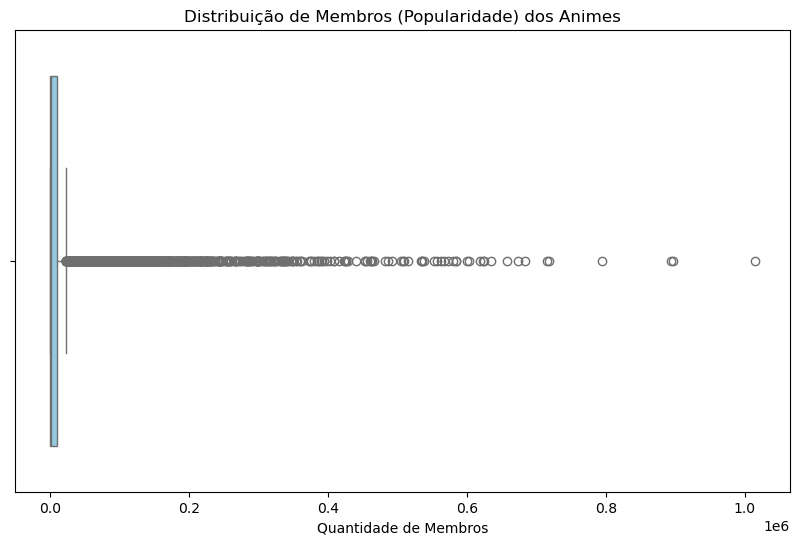

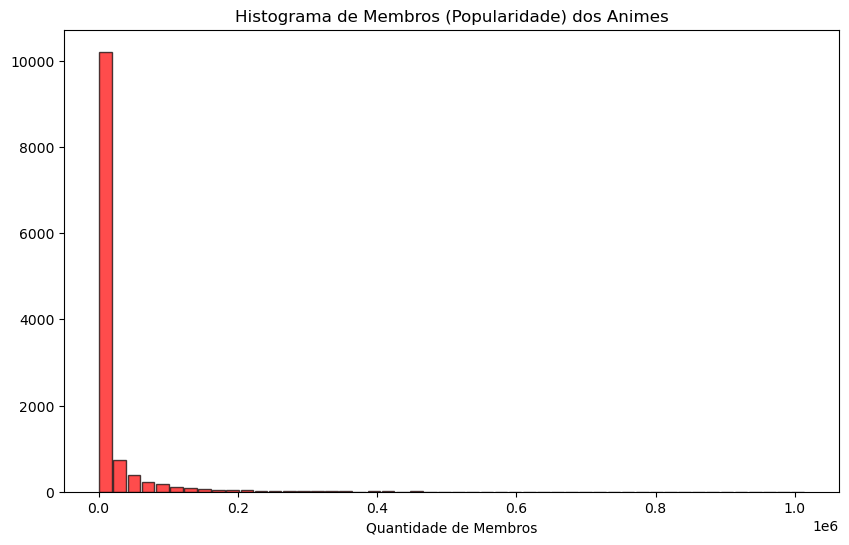

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['members'], color='skyblue')
plt.title('Distribuição de Membros (Popularidade) dos Animes')
plt.xlabel('Quantidade de Membros')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['members'].tolist(), bins=50, rwidth=0.9, color='red', alpha=0.7, edgecolor='black')
plt.title('Histograma de Membros (Popularidade) dos Animes')
plt.xlabel('Quantidade de Membros')
plt.show()

In [7]:
df_ordenado = df.sort_values(by='members', ascending=False)

# Exibindo os 5 primeiros para conferir
df_ordenado.head()

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


Como os dados não seguem a distribuição normal, vamos usar testes não paramétricos

Primeiro vamos verificar a correlação das variáveis usando o Coeficiente de Spearman

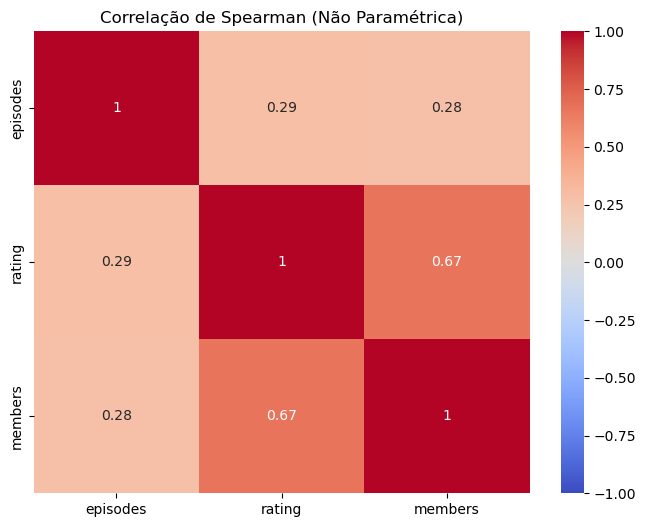

In [8]:
df = df.dropna(subset=['episodes', 'rating', 'members'])
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
cols_interesse = ['episodes', 'rating', 'members']
df_aux = df[cols_interesse]
correlacao = df_aux.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, vmax=1)
plt.title('Correlação de Spearman (Não Paramétrica)')
plt.show()

Observamos que existe correlação positiva média entre as variáveis members e rating, e correlação positiva fraca entre as demais variáveis